**#install ultralytics**


In [ ]:
!nvidia-smi


Mon Apr  3 08:10:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
! pip install ultralytics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 16.5 MB/s eta 0:00:00


#import

In [10]:
from ultralytics import YOLO

In [11]:
from IPython.display import display, Image

In [12]:
# # Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
# model.predict(source="download.jpg")

# **Train**

Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!ls

classes.txt  custom_models  labelmap.txt  test	 val	     yolov8s.pt
class.names  data.yaml	    runs	  train  yolov8n.pt


Training model 

In [15]:
%cd /content/drive/MyDrive/Colab Notebooks/Pothole
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=40 imgsz=640 plots=True

/content/drive/MyDrive/Colab Notebooks/Pothole
Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [14]:
!ls runs/detect/train/

args.yaml					     results.png
confusion_matrix.png				     train_batch0.jpg
events.out.tfevents.1680513996.5079d5c4258f.23611.0  train_batch1425.jpg
F1_curve.png					     train_batch1426.jpg
labels_correlogram.jpg				     train_batch1427.jpg
labels.jpg					     train_batch1.jpg
P_curve.png					     train_batch2.jpg
PR_curve.png					     val_batch0_labels.jpg
R_curve.png					     val_batch0_pred.jpg
results.csv					     weights


Showing Confusion Matrix

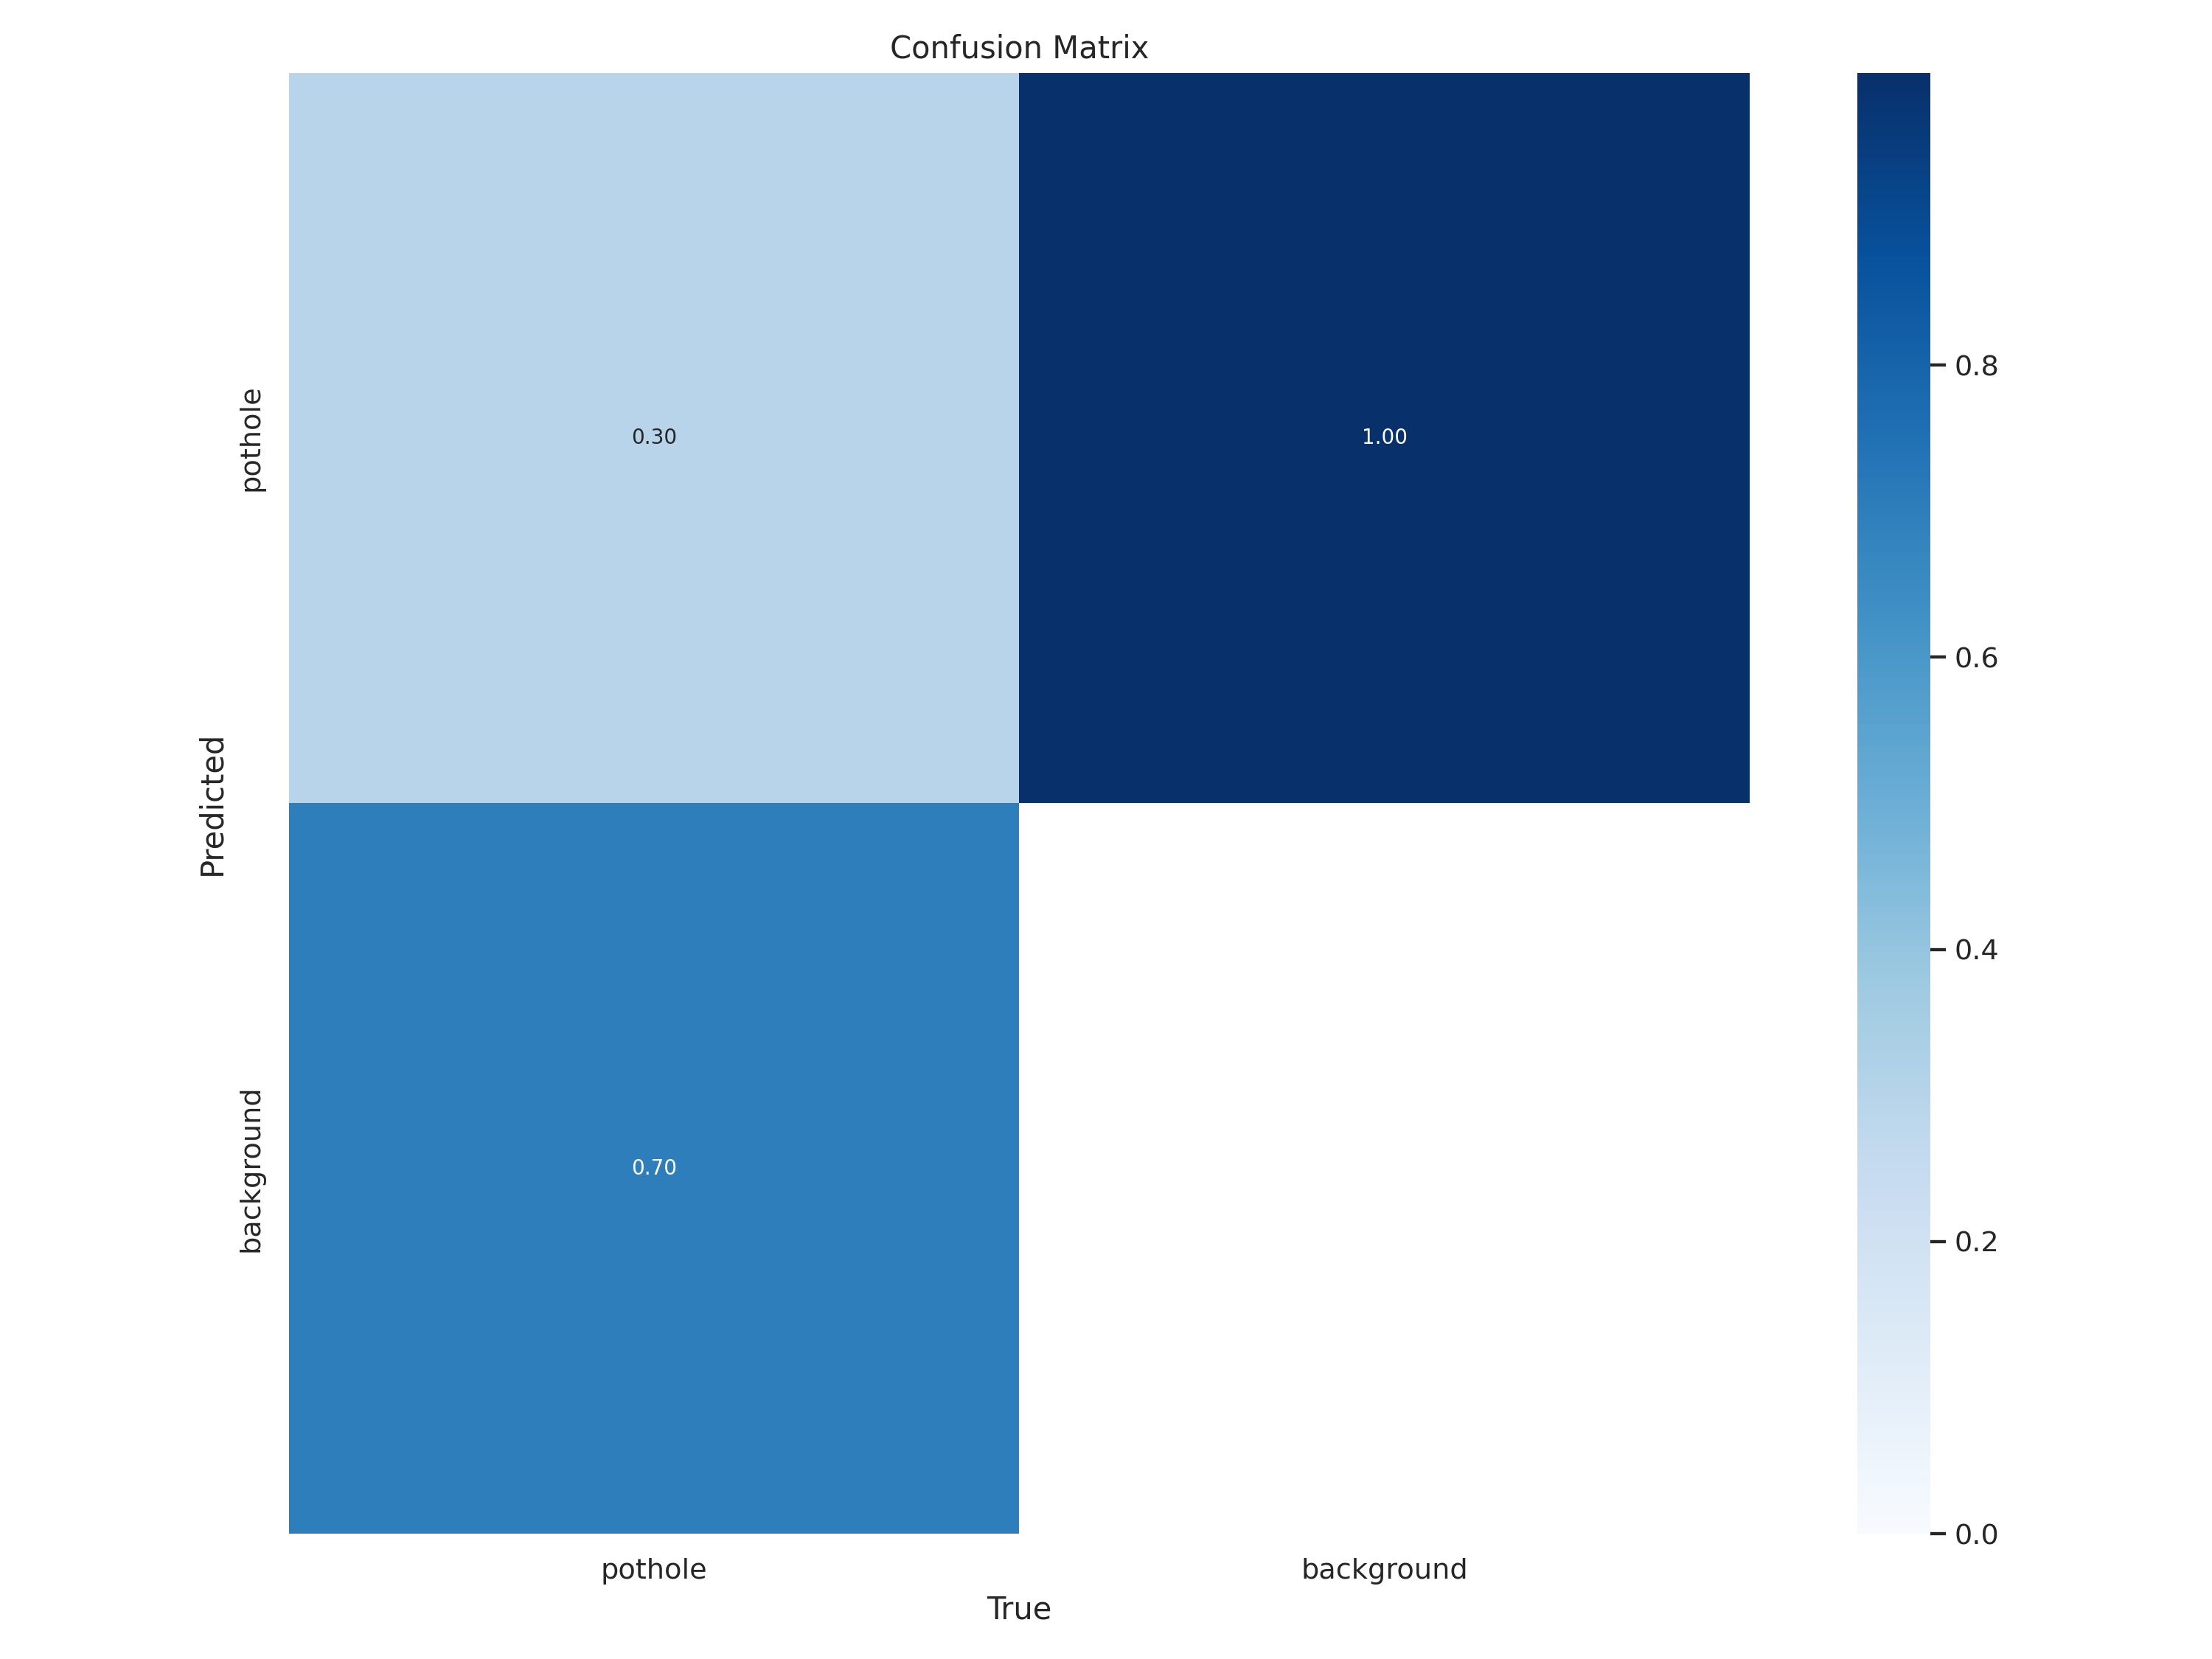

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

Showing Result graphs

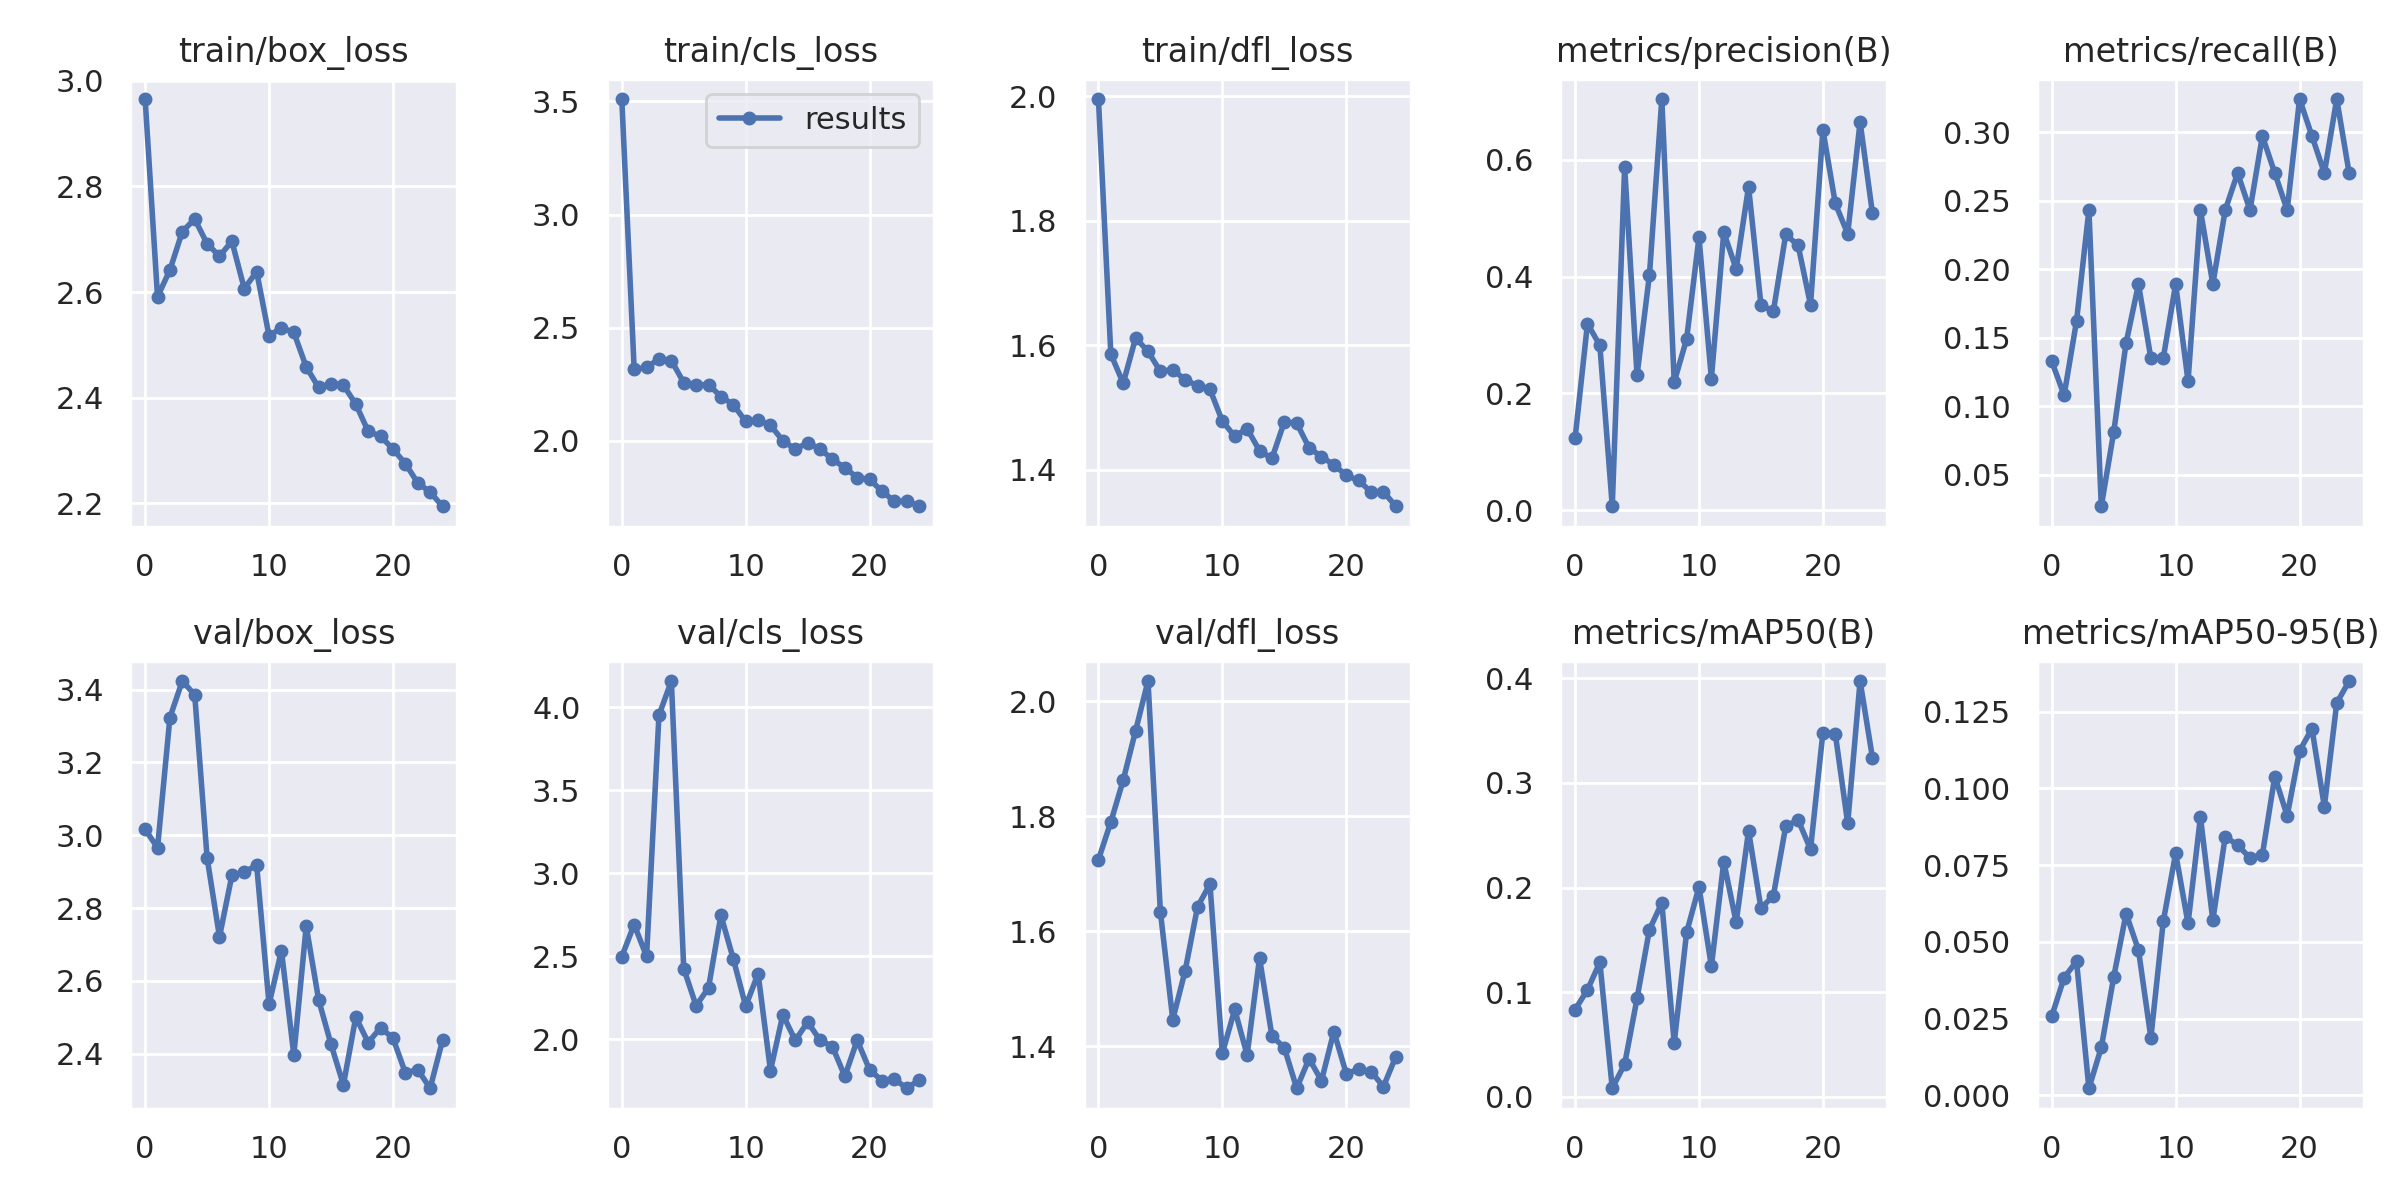

In [ ]:

Image(filename='runs/detect/train/results.png', width=600)

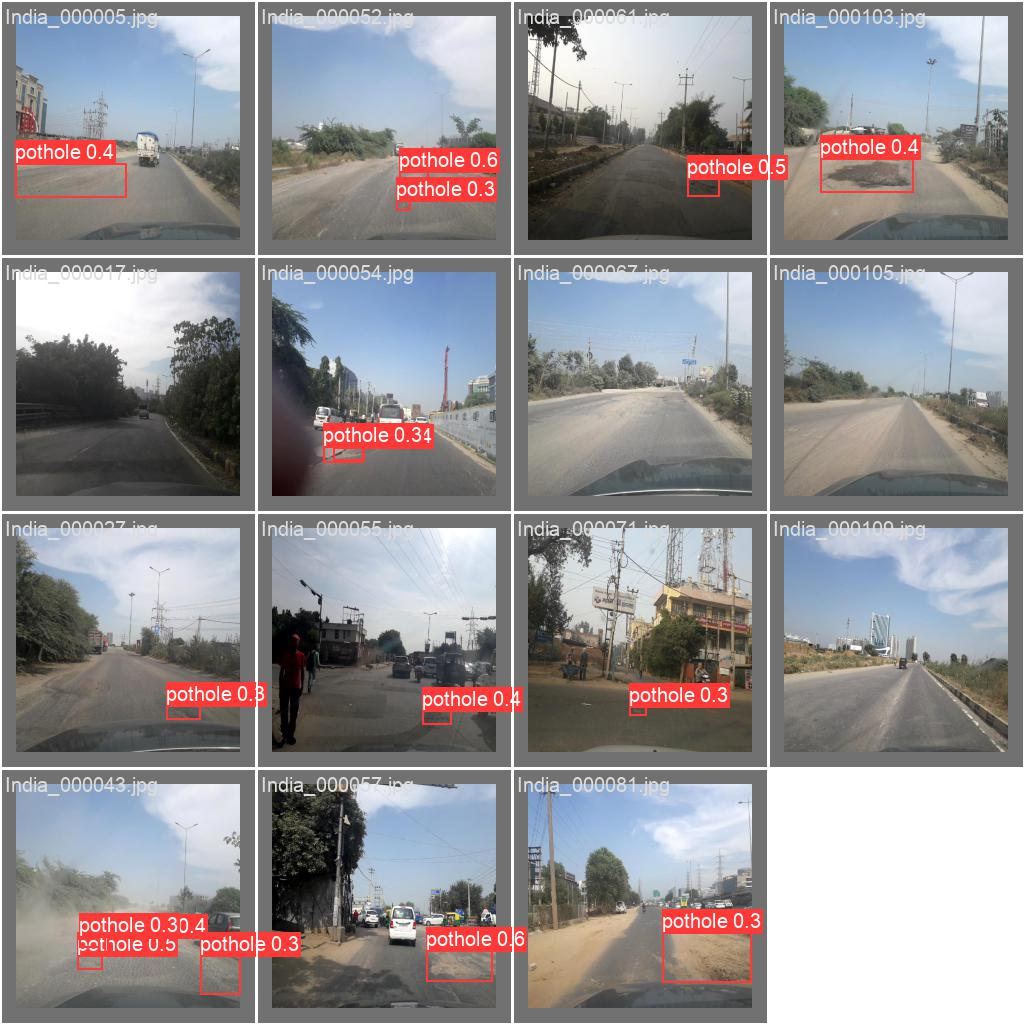

In [ ]:

Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)


# Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/Pothole/val/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.81it/s]
                   all         15         37      0.669      0.324      0.397      0.127
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


# Detecting with Custom Model

In [ ]:
!yolo task=detect mode=predict model=custom_models/y8best.pt conf=0.5 source=test/tested.mp4

Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs

video 1/1 (1/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 (no detections), 81.8ms
video 1/1 (2/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 (no detections), 78.7ms
video 1/1 (3/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 (no detections), 77.1ms
video 1/1 (4/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 (no detections), 77.5ms
video 1/1 (5/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 1 POTHOLES, 79.5ms
video 1/1 (6/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 1 POTHOLES, 79.4ms
video 1/1 (7/340) /content/drive/MyDrive/Colab Notebooks/Pothole/test/tested.mp4: 544x960 1 POTHOLES, 78.8ms
video 1/1 (8/340) /content/drive/MyDrive/Colab 

# Display the Tsst Image/Video

In [ ]:

!pwd

/content/drive/MyDrive/Colab Notebooks/Pothole
